In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adam

In [40]:
train=pd.read_csv("../input/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
test=pd.read_csv(input_file)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
train_set, test_set = train_test_split(df_train, test_size=0.20, random_state=42)

X_train_set = train_set.drop(['label'], axis=1)
y_train_set = train_set['label']

X_test_set = test_set.drop(['label'], axis=1)
y_test_set = test_set['label']

In [44]:
df_train_label_array = y_train_set.as_matrix()
df_train_image_array = X_train_set.as_matrix()

df_test_image_array = X_test_set.as_matrix()
df_test_label_array = y_test_set.as_matrix()

In [45]:
train_images = df_train_image_array.reshape(33600, 784)
test_images = df_test_image_array.reshape(8400, 784)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [46]:
train_labels = keras.utils.to_categorical(df_train_label_array, 10)
test_labels = keras.utils.to_categorical(df_test_label_array, 10)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


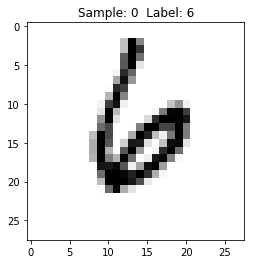

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


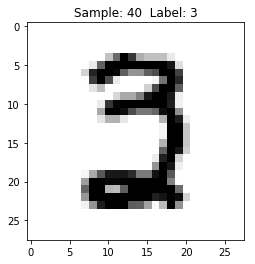

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


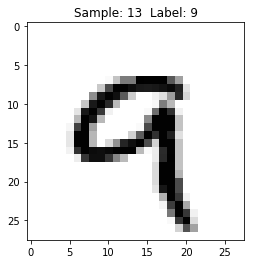

In [50]:
def display_sample(num): 
    print(train_labels[num])
    label = train_labels[num].argmax(axis=0)
    image = train_images[num].reshape([28,28])
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(0)
display_sample(40)
display_sample(13) 

In [51]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,))) 
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [53]:
history = model.fit(train_images, train_labels,
                    batch_size=50, 
                    epochs=20,
                    validation_data=(test_images, test_labels))


Train on 33600 samples, validate on 8400 samples
Epoch 1/20
33600/33600 [==============================] - 5s 155us/step - loss: 0.3816 - acc: 0.8815 - val_loss: 0.1763 - val_acc: 0.9451
Epoch 2/20
33600/33600 [==============================] - 5s 142us/step - loss: 0.1938 - acc: 0.9401 - val_loss: 0.1251 - val_acc: 0.9598
Epoch 3/20
33600/33600 [==============================] - 5s 143us/step - loss: 0.1487 - acc: 0.9534 - val_loss: 0.1083 - val_acc: 0.9668
Epoch 4/20
33600/33600 [==============================] - 5s 144us/step - loss: 0.1308 - acc: 0.9601 - val_loss: 0.1080 - val_acc: 0.9671
Epoch 5/20
33600/33600 [==============================] - 5s 144us/step - loss: 0.1189 - acc: 0.9642 - val_loss: 0.0968 - val_acc: 0.9693
Epoch 6/20
33600/33600 [==============================] - 5s 145us/step - loss: 0.1052 - acc: 0.9677 - val_loss: 0.0867 - val_acc: 0.9731
Epoch 7/20
33600/33600 [==============================] - 5s 143us/step - loss: 0.0954 - acc: 0.9699 - val_loss: 0.0895 - v

In [54]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09237103710770109
Test accuracy: 0.9777380952380952


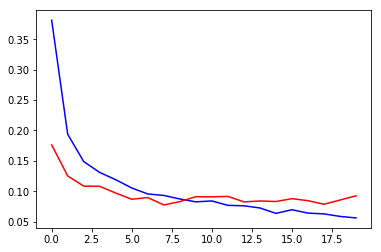

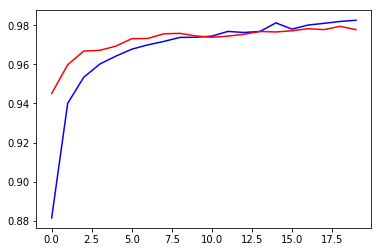

In [56]:
plt.plot(history.history['loss'], color='b')
plt.plot(history.history['val_loss'], color='r')
plt.show()
plt.plot(history.history['acc'], color='b')
plt.plot(history.history['val_acc'], color='r')
plt.show()